# result analysis Virtual Ship

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cmocean
import numpy as np
from geopy import distance

import glob
import gsw
import warnings
import xarray as xr
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [10]:
adcp = xr.open_zarr("adcp.zarr").compute()
ctd = xr.open_zarr("ctd.zarr").compute()
bathy = xr.open_dataset("gebco_2024_n11.0_s3.0_w44.0_e57.0.nc")

In [38]:
bathy

<xarray.Dataset> Size: 12MB
Dimensions:    (lat: 1920, lon: 3120)
Coordinates:
  * lat        (lat) float64 15kB 3.002 3.006 3.01 3.015 ... 10.99 10.99 11.0
  * lon        (lon) float64 25kB 44.0 44.01 44.01 44.01 ... 56.99 56.99 57.0
Data variables:
    elevation  (lat, lon) int16 12MB ...
Attributes: (12/36)
    title:                           The GEBCO_2024 Grid - a continuous terra...
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    references:                      DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    node_offset:                     1.0

In [46]:
bathy

<xarray.Dataset> Size: 12MB
Dimensions:    (lat: 1920, lon: 3120)
Coordinates:
  * lat        (lat) float64 15kB 3.002 3.006 3.01 3.015 ... 10.99 10.99 11.0
  * lon        (lon) float64 25kB 44.0 44.01 44.01 44.01 ... 56.99 56.99 57.0
Data variables:
    elevation  (lat, lon) int16 12MB 250 246 244 248 ... -4108 -4103 -4097 -4091
Attributes: (12/36)
    title:                           The GEBCO_2024 Grid - a continuous terra...
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    references:                      DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    node_offset:                     1.0

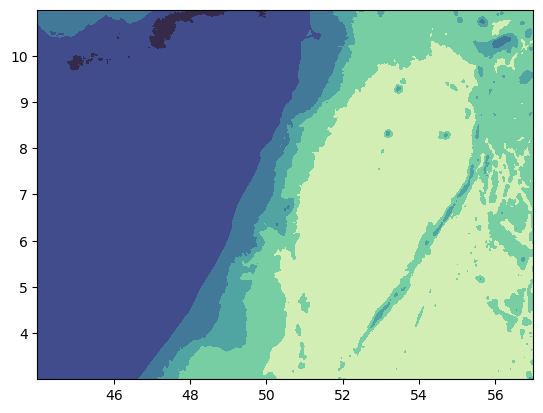

In [47]:
#p = ax.scatter(x,y,z, c=z, s=20, marker="o", cmap='viridis_r', depthshade=False)
#cb = plt.colorbar(p, shrink=0.5)

#fig = plt.figure(figsize=(13,10))
#ax = plt.axes()

#f = plt.scatter(bathy['lat'], bathy['lon'], c=bathy.elevation, cmap=cmocean.cm.deep)
plt.contourf(bathy['lon'], bathy['lat'], bathy.elevation, cmap=cmocean.cm.deep)

In [19]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [4]:
adcp

<xarray.Dataset> Size: 468kB
Dimensions:     (trajectory: 40, obs: 416)
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 409 410 411 412 413 414 415
  * trajectory  (trajectory) int64 320B 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40
Data variables:
    U           (trajectory, obs) float32 67kB -0.01641 -0.0164 ... 0.3864
    V           (trajectory, obs) float32 67kB -0.0464 -0.04636 ... -0.1594
    lat         (trajectory, obs) float32 67kB 5.03 5.03 5.03 ... 9.063 9.063
    lon         (trajectory, obs) float32 67kB 49.45 49.45 49.45 ... 55.83 55.83
    time        (trajectory, obs) datetime64[ns] 133kB 2024-09-17T23:12:00 .....
    z           (trajectory, obs) float32 67kB -1e+03 -1e+03 ... -5.0 -5.0
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_velocity
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [7]:
maxlat=np.max(adcp['lat'])
maxlon= np.max(adcp['lon'])
minlat = np.min(adcp['lat'])
minlon =np.min(adcp['lon'])

Text(0.5, 1.0, 'ADCP\xa0data')

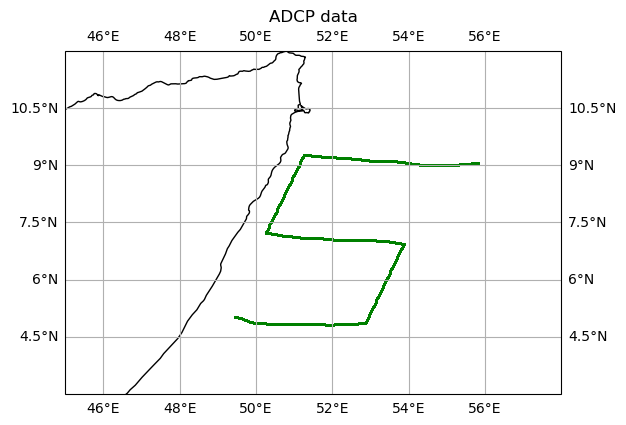

In [16]:
#somalia = xr.open_zarr("/Users/areti/OneDrive/Desktop/UU/OcenDyn/virtual_ship_data/results/results/adcp.zarr").compute()

# for convenience, define z positive upward
zu = np.unique(-adcp.z, axis=1).squeeze()  # convert z to 1D and positive upward
somalia = adcp.assign_coords({"z": ("trajectory", zu)}).sortby("z")

# plot track
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(adcp.lon, adcp.lat, transform=ccrs.PlateCarree(), s= 1, color = 'green')
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent((45, 58, 3, 12))
ax.set_title("ADCP data")

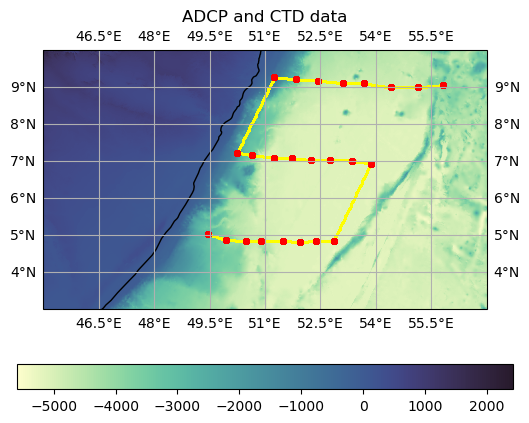

In [56]:
# plot track

ax = plt.axes(projection=ccrs.PlateCarree())
#cm = bathy.elevation.plot(ax=ax)
cm = plt.pcolormesh(bathy.lon,bathy.lat,bathy.elevation, cmap=cmocean.cm.deep)
ax.scatter(adcp.lon, adcp.lat, transform=ccrs.PlateCarree(), s= 1, color = 'yellow', label='Trajectory')
ax.scatter(ctd.lon, ctd.lat, transform=ccrs.PlateCarree(), s= 15, color = 'red', label='')

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent((45, 57, 3, 10))
ax.set_title("ADCP and CTD data")
plt.colorbar(cm, location='bottom', label='depth  (m)')

AttributeError: 'Colorbar' object has no attribute 'set_clim'

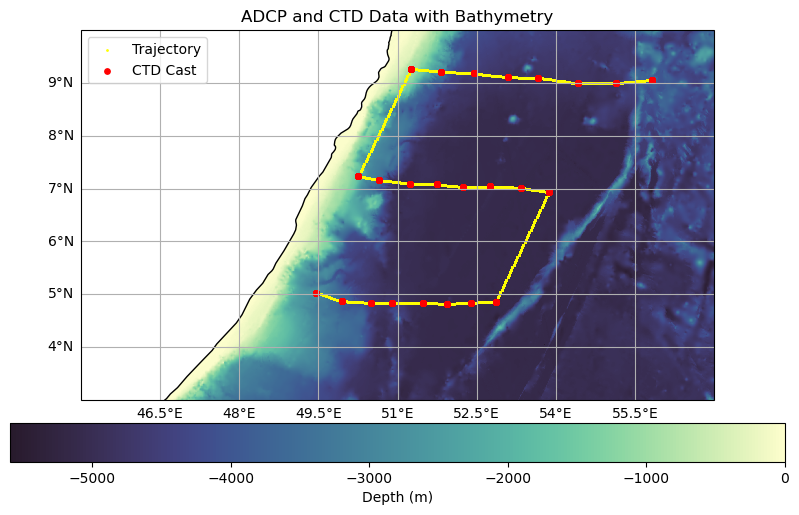

In [61]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Mask positive elevations (topography), keeping only bathymetry
bathy_masked = bathy.elevation.where(bathy.elevation <= 0)

# Plot bathymetry
cm = ax.pcolormesh(bathy.lon, bathy.lat, bathy_masked, cmap=cmocean.cm.deep_r, shading='auto')

# Plot ADCP and CTD data points
ax.scatter(adcp.lon, adcp.lat, transform=ccrs.PlateCarree(), s=1, color='yellow', label='Trajectory')
ax.scatter(ctd.lon, ctd.lat, transform=ccrs.PlateCarree(), s=15, color='red', label='CTD Cast')

# Add coastline, gridlines, and extent
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False  # Hide right labels
gl.top_labels = False  # Hide top labels
ax.set_extent((45, 57, 3, 10))

# Add title and legend
ax.set_title("ADCP and CTD Data with Bathymetry")
ax.legend(loc='upper left')

# Add colorbar with limits set from 0 downward
cbar = plt.colorbar(cm, ax=ax, orientation='horizontal', label='Depth (m)', pad=0.05)
cbar.set_clim(0, bathy_masked.min())  # Ensure colorbar goes from 0 downward

plt.show()

In [62]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

def crosssection(data, xdim='LATITUDE'):
    """convert data for 'cross section' plot (actually projection along x-axis)

    data : list of DataArray
        list of CTD cast datasets
    xdim : str
        horizontal coordinate in output

    x : 1D horizontal coordinate
    y : 1D vertical coordate (pressure)
    temp : output temperature (y,x)
    salt : output salinity (y,x)
    """
    data = [ds.squeeze() for ds in data]
    data = [data[i] for i in np.argsort([ds[xdim] for ds in data])] # sort by xdim
    x = np.array([ds[xdim].item() for ds in data])
    PMAX = np.max([ds.PRES.max() for ds in data]) # max pressure measured
    y = np.arange(1,PMAX+1,2)
    # below: one-line function taking in dataset and returning variable interpolated to pressures y
    vinterp = lambda ds, var: np.interp(y, ds.PRES, ds[var], left=np.nan, right=np.nan)
    temp = np.array([vinterp(ds, 'TEMPST01') for ds in data]).T
    salt = np.array([vinterp(ds, 'PSALPR01') for ds in data]).T
    return x,y,temp,salt

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

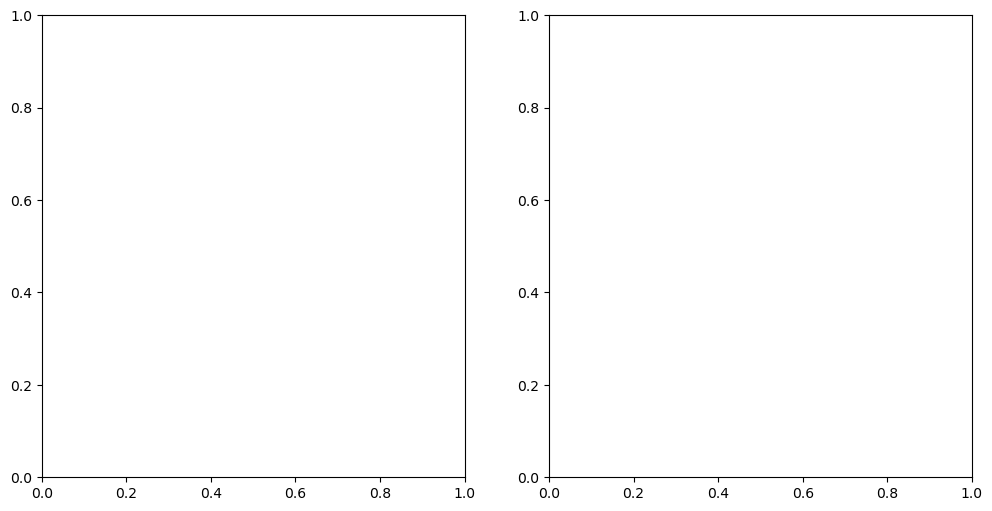

In [64]:
# Plotting Section
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Creating pcolormesh plots
temp_plot = ax[0].pcolormesh(ctd.lon, ctd.z, ctd.temperature, cmap=cmocean.cm.thermal)
salt_plot = ax[1].pcolormesh(ctd.lon, ctd.z, ctd.salinity, cmap=cmocean.cm.haline)

# Adding colorbars
cb_temp = fig.colorbar(temp_plot, ax=ax[0], label='Temperature [°C]')
cb_salt = fig.colorbar(salt_plot, ax=ax[1], label='Salinity [PSU]')

# Adding labels and title
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Temperature Profile")
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Depth (m)")
ax[1].set_title("Salinity Profile")

# Adding grid
for a in ax:
    a.grid(True, linestyle='--', alpha=0.5)
    for x_val in x:
        a.axvline(x=x_val, color='w', linestyle=':')

# Saving the figure
#plt.savefig("ocean_profiles.png", dpi=300)
plt.show()